In [13]:
import re
import pymorphy2 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
analyzer = pymorphy2.MorphAnalyzer()

c:\users\luigi\.virtualenvs\computational_linguistics\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luigi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Luigi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\users\luigi\.virtualenvs\computational_linguistics\lib\site-packages\pymorphy2\units\base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
c:\users\lui

In [14]:
import json
with open('clean_corpus') as file:
  corpus = json.load(file)

c:\users\luigi\.virtualenvs\computational_linguistics\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
def text_to_wordlist(text, remove_stopwords=False):
    text = re.sub("[^а-яА-ЯёЁ]"," ", re.sub(r'\((.*?)\)', "", text))
    words = word_tokenize(text)
    norm_words = [analyzer.parse(word)[0].normal_form for word in words]
    if remove_stopwords:
      stops = stopwords.words("russian") + ["это", "который", "наш", "мочь", "год", 
                                            "такой", "знать", "мы", "свой", "один", "другой", "хотеть",
                                            "человек", "всё", "весь", "очень", "думать", "нужно",
                                            "большой", "время", "использовать", "говорить", "сказать",
                                            "иметь", "сделать", "первый", "каждый", "день", "её", "ваш",
                                            "стать", "больший", "ваше", "день", "самый", "понять",
                                            "просто", "ещё", "проблема", "также", "например", "год", "имя", 
                                            "июль", "январь", "группа", "август", "век", "название", "псевдоним", 
                                            "март", "октябрь", "июнь", "апрель", "декабрь", "февраль", "часть", 
                                            "ноябрь", "ряд", "май"]
      norm_words = [w for w in norm_words if w not in stops]
    return norm_words

c:\users\luigi\.virtualenvs\computational_linguistics\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
clean_corpus = list(map(lambda row: text_to_wordlist(row["text"], remove_stopwords=True), corpus))

c:\users\luigi\.virtualenvs\computational_linguistics\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
clean_corpus[8]

c:\users\luigi\.virtualenvs\computational_linguistics\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['кандидат',
 'радиосигнал',
 'проект',
 'основать',
 'юрий',
 'мильнер',
 'потенциально',
 'исходящий',
 'экзопланета',
 'проксим',
 'центавро',
 'сигнал',
 'частота',
 'мгц',
 'сдвиг',
 'частота',
 'соответствовать',
 'орбитальный',
 'движение',
 'проксим',
 'радиосигнал',
 'зарегистрировать',
 'течение',
 'час',
 'наблюдение',
 'провести',
 'обсерватория',
 'паркс',
 'австралия',
 'обнаружение',
 'сигнал',
 'объявить',
 'состояние',
 'последующий',
 'наблюдение',
 'снова',
 'смочь',
 'обнаружить',
 'сигнал',
 'необходимо',
 'подтверждение',
 'сигнал',
 'техносигнатура']

In [18]:
all_words = []
for text in clean_corpus:
  for word in text:
      all_words.append(word)
len(all_words)

c:\users\luigi\.virtualenvs\computational_linguistics\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


13679

In [19]:
import gensim.corpora as corpora

c:\users\luigi\.virtualenvs\computational_linguistics\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
id2word = corpora.Dictionary(clean_corpus)
texts = clean_corpus
corpus = [id2word.doc2bow(text) for text in texts]

c:\users\luigi\.virtualenvs\computational_linguistics\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 9), (21, 1), (22, 2), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 4), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 3), (70, 3), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 3), (88, 1), (89, 1), (90, 3), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1)]


c:\users\luigi\.virtualenvs\computational_linguistics\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

c:\users\luigi\.virtualenvs\computational_linguistics\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
	Подсчет c_v когерентности для различного количества тем
	dictionary : Gensim словарь
	corpus : Gensim корпус
	texts : Список текста
	limit : Максимальное количество тем
	
	model_list : Список LDA моделей
	coherence_values :Когерентности, соответствующие модели LDA с количеством тем
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

c:\users\luigi\.virtualenvs\computational_linguistics\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=40, step=2)

c:\users\luigi\.virtualenvs\computational_linguistics\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\users\luigi\.virtualenvs\computational_linguistics\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


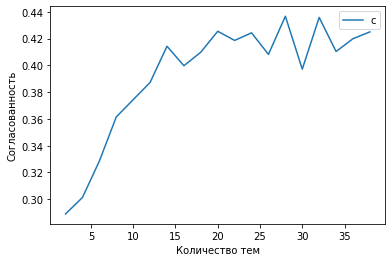

In [25]:
import matplotlib.pyplot as plt
limit=40; start=2; step=2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Количество тем")
plt.ylabel("Согласованность")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [26]:
lda_model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=23)
lda_model.print_topics()

c:\users\luigi\.virtualenvs\computational_linguistics\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(15,
  '0.010*"сигнал" + 0.008*"убийство" + 0.007*"известный" + 0.006*"мальчик" + 0.006*"передача" + 0.006*"мария" + 0.006*"корабль" + 0.005*"найти" + 0.005*"стигнуть" + 0.005*"хагли"'),
 (16,
  '0.007*"преступление" + 0.005*"настоящий" + 0.005*"известный" + 0.005*"дело" + 0.005*"татцельвурм" + 0.005*"ребёнок" + 0.005*"пропасть" + 0.004*"легенда" + 0.004*"существо" + 0.004*"животное"'),
 (3,
  '0.006*"существо" + 0.006*"убийца" + 0.006*"известный" + 0.005*"смерть" + 0.005*"оба" + 0.004*"серийный" + 0.004*"дамер" + 0.004*"жертва" + 0.004*"неизвестный" + 0.004*"корабль"'),
 (8,
  '0.011*"существо" + 0.006*"якобы" + 0.005*"легенда" + 0.004*"несколько" + 0.004*"ругар" + 0.004*"ребёнок" + 0.004*"исчезновение" + 0.004*"неизвестный" + 0.004*"писатель" + 0.004*"обитать"'),
 (22,
  '0.009*"холт" + 0.007*"существо" + 0.005*"чупакабра" + 0.005*"буэнос" + 0.005*"айрес" + 0.004*"мирон" + 0.004*"результат" + 0.004*"легенда" + 0.004*"джон" + 0.004*"лицо"'),
 (9,
  '0.007*"исчезновение" + 0.007*"маль

In [27]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared


c:\users\luigi\.virtualenvs\computational_linguistics\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
4     -0.084033  0.003868       1        1  8.491532
8     -0.038974  0.055169       2        1  7.723676
2      0.030065  0.020426       3        1  6.453608
11    -0.017818  0.007408       4        1  5.826076
21    -0.024738  0.049842       5        1  5.813346
6      0.003697  0.059587       6        1  5.396221
20    -0.029170 -0.065056       7        1  5.257375
9      0.041020 -0.028443       8        1  5.079888
16    -0.044715  0.053504       9        1  4.917831
10    -0.072145 -0.112943      10        1  4.752070
19     0.037492 -0.027216      11        1  4.628168
7     -0.063510 -0.095139      12        1  4.574518
1      0.105242 -0.003519      13        1  4.437242
3      0.006200  0.000797      14        1  4.020455
17     0.029764 -0.041038      15        1  3.738747
22    -0.052515  0.091251      16        1  3.211734
5      0.079466 -0.006770      17        1  3.051951
15     0.069876  0.016147      18        1  2.853245
13    -0.048055  0.016370      19        1  2.398932
18     0.024621 -0.021951      20        1  2.290209
12     0.070019 -0.008990      21        1  2.187842
0      0.002062  0.004539      22        1  1.720775
14    -0.023850  0.032158      23        1  1.174561, topic_info=            Term       Freq      Total Category  logprob  loglift
970     существо  47.000000  47.000000  Default  30.0000  30.0000
452       сигнал   8.000000   8.000000  Default  29.0000  29.0000
1580       ругар  14.000000  14.000000  Default  28.0000  28.0000
116      мальчик  14.000000  14.000000  Default  27.0000  27.0000
749   фотография  19.000000  19.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
798     животное   0.501487  33.678205  Topic23  -5.7695   0.2372
341        часто   0.405582  10.935614  Topic23  -5.9818   1.1498
203         тело   0.448696  31.918007  Topic23  -5.8808   0.1797
149   установить   0.438519  30.541028  Topic23  -5.9037   0.2009
397    несколько   0.429358  30.714502  Topic23  -5.9248   0.1741

[1513 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
3774      9  0.685436            абу
2233     17  0.499429           авар
3116     10  0.469674     авельянеда
4657     11  0.664620        авиатор
153       1  0.422843  австралийский
...     ...       ...            ...
697      20  0.036806          якобы
697      23  0.036806          якобы
1492      2  0.645186         якутия
3786      9  0.685385           яффа
923       7  0.623000           яхта

[2885 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 3, 12, 22, 7, 21, 10, 17, 11, 20, 8, 2, 4, 18, 23, 6, 16, 14, 19, 13, 1, 15])